##Analiza rezerwacji hoteli


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
import os
print(os.getcwd())
drive.mount('/content/drive')

/content
Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/kurs/hotel_bookings.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


#Reprezentacja i zrozumienie danych

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Powyższe dane obrazują jakie informacje zawierają posiadane przez nas dane.

In [6]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [7]:
df['hotel'].unique()



array(['Resort Hotel', 'City Hotel'], dtype=object)

In [8]:
df['is_repeated_guest'].unique()

array([0, 1])

In [9]:
df['is_canceled'].unique()

array([0, 1])

Dzięki temu widzimy ile różnych wartości znajduje się w każdej z kolumn. Najbardziej różnorodną ilość wartości posiada kolumna 'adr' czyli średniej kwoty przychodu na dzień, jednak najmniejszą ilość różnych wartości posiadają kolumny 'is_repeated_guest', 'hotel' oraz 'is_canceled', gdzie widać powyżej ich wartości.

In [10]:
df['hotel'].value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

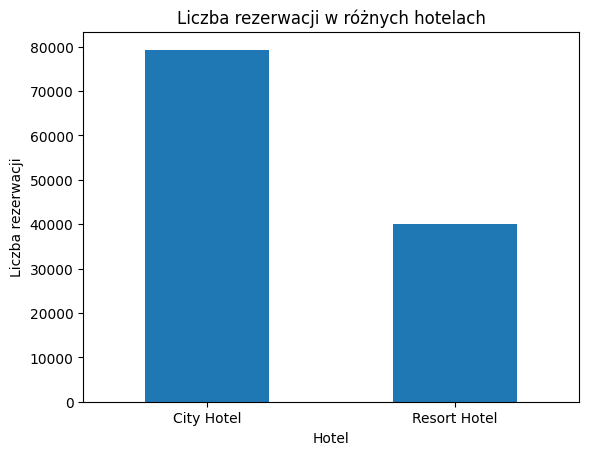

In [11]:
hotel_counts = df['hotel'].value_counts()
hotel_counts.plot(kind='bar')
plt.title('Liczba rezerwacji w różnych hotelach')
plt.xlabel('Hotel')
plt.ylabel('Liczba rezerwacji')
plt.xticks(rotation=0)
plt.show()

Można zauważyć, że w hotelu 'City Hotel' liczba rezerwacji jest niemal 2 razy większa niż w hotelu 'Resort Hotel'. Zatem dane są niezrównoważone (stosunek wartości jest daleki od '1')


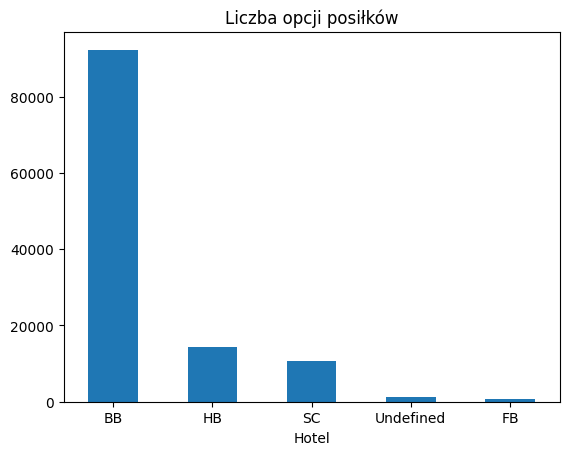

In [12]:
meal = df['meal'].value_counts()
meal.plot(kind='bar')
plt.title('Liczba opcji posiłków')
plt.xlabel('Hotel')
plt.xticks(rotation=0)
plt.show()

Najchętniej goście wybierają opcję BB czyli wyłącznie śniadania. Na drugim miejscu są obiadokolacje i brak wyżywienia. Najrzadziej wybierana jest opcja pełnego wyżywienia. Również pojawiła się piąta opcja, jednak jest ona niezdefiniowana.

In [13]:
df['country'].value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [14]:
country_counts = df['country'].value_counts()
max_country_counts = country_counts.max()
max_countries = country_counts[country_counts == max_country_counts].index.tolist()
print(f"Kraje z największą liczbą wystąpień ({max_country_counts} wystąpień): {', '.join(max_countries)}")

Kraje z największą liczbą wystąpień (48590 wystąpień): PRT


In [15]:
city_hotel_df = df[df['hotel'] == 'City Hotel']
country_counts = city_hotel_df['country'].value_counts()
max_count = country_counts.max()
max_countries = country_counts[country_counts == max_count].index.tolist()

print(f"Kraje z największą liczbą gości w City Hotel ({max_count} gości): {', '.join(max_countries)}")

Kraje z największą liczbą gości w City Hotel (30960 gości): PRT


In [16]:
city_hotel_df = df[df['hotel'] == 'Resort Hotel']
country_counts = city_hotel_df['country'].value_counts()
max_count = country_counts.max()
max_countries = country_counts[country_counts == max_count].index.tolist()
print(f"Kraje z największą liczbą gości w Resort Hotel ({max_count} gości): {', '.join(max_countries)}")

Kraje z największą liczbą gości w Resort Hotel (17630 gości): PRT



*   W obu hotelach najliczniejszymi gośćmi są portugalczycy.




In [17]:
guest_country=df[df['is_canceled']==0]['country'].value_counts().reset_index()
guest_country.columns=['country', 'Number_of_guests']

In [18]:
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

In [19]:
total_guests = guest_country["Number_of_guests"].sum()
print(total_guests)

74745


In [20]:
guest_country["Guests in %"] = round(guest_country["Number_of_guests"] / total_guests * 100, 2)
guest_country

,country,Number_of_guests,Guests in %
0,PRT,21071,28.19
1,GBR,9676,12.95
2,FRA,8481,11.35
3,ESP,6391,8.55
4,DEU,6069,8.12
...,...,...,...
160,BHR,1,0.00
161,DJI,1,0.00
162,MLI,1,0.00
163,NPL,1,0.00


In [21]:
trace= go.Bar(
    x=guest_country["country"],
    y=guest_country['Number_of_guests'],
    marker=dict(color='#CD32CD')
)
data1 = [ trace]
layout = go.Layout(
    title='Guests by Country'
)
fig = go.Figure(data=data1, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [22]:
map_guest = px.choropleth(guest_country,
                    locations=guest_country['country'],
                    color=guest_country['Number_of_guests'],
                    hover_name=guest_country['country'],
                    title="Home country of guests")
map_guest.show()

50% gości pochodzi z Europy i takich krajów jak Portugalia, Francja, Niemcy, Hiszpania czy Wielka Brytania.

<Axes: xlabel='hotel', ylabel='count'>

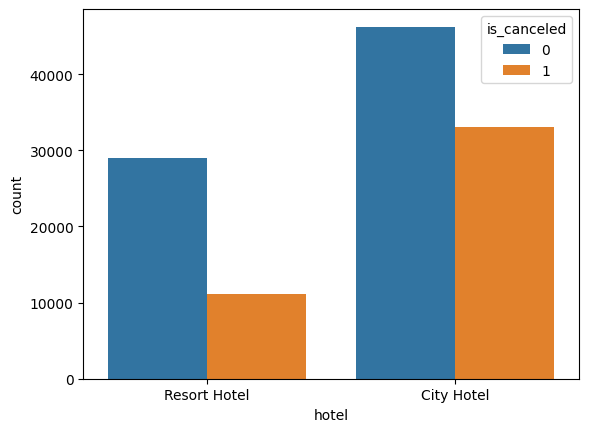

In [23]:
sns.countplot(data=df,x='hotel',hue='is_canceled')

Z wykresu można odczytać, że więcej odwołanych rezerwacji miało miejsce w 'City Hotel'

In [24]:
df['children'].value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

#Przygotowanie danych do analizy

In [25]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [26]:
df.fillna(0,inplace=True)

Zastąpiliśmy brakujące dane zerami.

In [27]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [28]:
df['meal'].replace('Undefined', 'SC', inplace=True)

Wartości, które były niezdefiniowane zostały zastąpione 'SC' czyli wyżywieniem we własnym zakresie.

In [29]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [30]:
Subset=df[(df['children']==0) & (df['adults']==0)& (df['babies']==0)]

In [31]:
Subset[['adults', 'babies', 'children']]

,adults,babies,children
2224,0,0,0.0
2409,0,0,0.0
3181,0,0,0.0
3684,0,0,0.0
3708,0,0,0.0
...,...,...,...
115029,0,0,0.0
115091,0,0,0.0
116251,0,0,0.0
116534,0,0,0.0


Usuwamy 180 wierszy, których wartość jest równa '0'

In [32]:
Delete=(df['children']==0) & (df['adults']==0)& (df['babies']==0)

In [33]:
Data =df[~Delete]

In [34]:
Data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [35]:
Data.shape

(119210, 32)

# Analiza ceny pokoi

Aby przeprowadzić analizę ceny za pokój pod uwagę wzięłam tylko pokoje, które nie zostały odwołane, czyli gdzie wartość 'is_canceled'=0.

In [36]:
resort = Data[(Data["hotel"] == "Resort Hotel") & (Data["is_canceled"] == 0)]
city = Data[(Data["hotel"] == "City Hotel") & (Data["is_canceled"] == 0)]

In [37]:
resort_hotel=resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [40]:
city_hotel=city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [41]:
final=resort_hotel.merge(city_hotel,on='arrival_date_month')
final.columns=['month','price_for_resort','price_for_city_hotel']
final

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


Z powyższych informacji można wywnioskować, że ceny w 'Resort Hotel' są niższe od cen w hotelu 'City Hotel'. Cena jest niemal 1.5 razy wyższa. Jedynymi miesiącami, gdzie jest odwrotnie jest sierpień (ok. 50% drożej) oraz lipiec (ok. 30% drożej)

In [49]:
pip install sorted-months-weekdays

  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3224 sha256=6feca6e6c39150d64408d64d5b74a1c21d90ac24ca205ba853a3692504dbad20
  Stored in directory: /root/.cache/pip/wheels/bd/b4/f6/2c29a96668a9a13a568134857fd7b7a5186261f00f1d35661c
Successfully built sorted-months-weekdays


In [50]:
from sorted_months_weekdays import Month_Sorted_Month, Weekday_Sorted_Week

In [54]:
import sort_dataframeby_monthorweek as sd
final=sd.Sort_Dataframeby_Month(df=final,monthcolumnname='month')
final

,month,price_for_resort,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [58]:
px.line(final, x='month',
        y=['price_for_resort','price_for_city_hotel'],
        title='Cena noclegu za 1 dobę w każdym miesiącu')

Wykres obrazuje ceny za noc w hotelach. W okresie wakacyjnym ceny bieltów w 'Resort Hotel' wykazują gwałtowny wzorst i tym samym przewyższają cenę drugiego hotelu. Natomiast ceny w hotelu 'City hotel' przez cały rok utrzymują się mniej więcej na tym samym poziomie.

In [69]:
Data['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'B'], dtype=object)

In [70]:
Data["adr_Updated"]=Data["adr"]/(Data["adults"]+Data["children"])
Data

<ipython-input-70-c0ccffcafbb4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_Updated
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015,0.000000
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015,0.000000
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015,75.000000
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015,75.000000
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015,49.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017,48.070000
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017,75.143333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017,78.855000
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017,52.200000


<ipython-input-71-0eea3cbf2f9c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



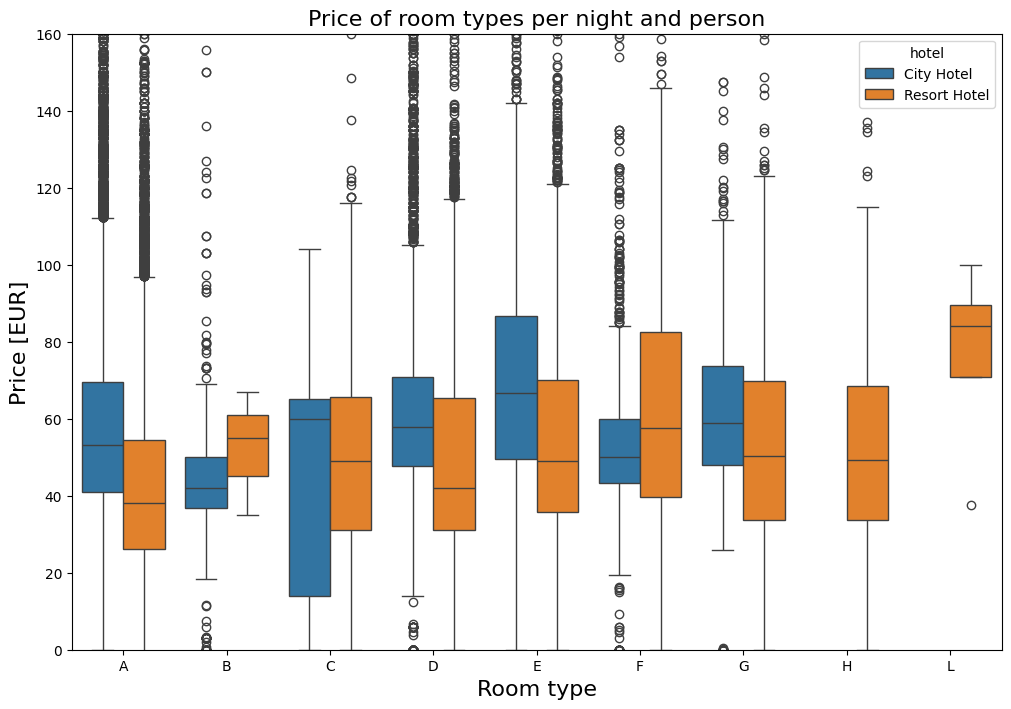

In [71]:
Data["adr_Updated"]=Data["adr"]/(Data["adults"]+Data["children"])
valid_guest= Data.loc[Data["is_canceled"] == 0]
prices = valid_guest[["hotel", "reserved_room_type", "adr_Updated"]].sort_values("reserved_room_type")

plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_Updated",
            hue="hotel",
            data=prices
           )
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)

plt.ylim(0, 160)
plt.show()

Mediany cen są wyraźnie różne w zależności od typu pokoju i rodzaju hotelu. Na przykład, dla typu A,C,D, E, G mediana jest znacznie niższa w hotelu 'Resort', a dla pozostałych typów, jest znacznie wyższa w hotelu 'City'. Można zauważyć, że w 'City Hotel' nie ma pokoi o typie H i L. Większość typów pokoi w hotelu 'City' ma mniejszy rozrzut cenowy w porównaniu do hotelu 'Resort', co sugeruje na bardziej stabilne ceny.

In [72]:
prices_C=prices[prices['reserved_room_type']=='C']
prices_C

,hotel,reserved_room_type,adr_Updated
119278,City Hotel,C,104.000000
99432,City Hotel,C,65.000000
99431,City Hotel,C,65.000000
101137,City Hotel,C,55.000000
0,Resort Hotel,C,0.000000
...,...,...,...
27668,Resort Hotel,C,88.500000
39525,Resort Hotel,C,87.500000
15642,Resort Hotel,C,62.500000
15609,Resort Hotel,C,40.500000


In [73]:
prices_City=prices_C[prices_C['hotel']=='City Hotel']
prices_Resort=prices_C[prices_C['hotel']=='Resort Hotel']
prices_Resort

,hotel,reserved_room_type,adr_Updated
0,Resort Hotel,C,0.000000
34951,Resort Hotel,C,30.250000
15955,Resort Hotel,C,47.366667
25990,Resort Hotel,C,62.166667
15960,Resort Hotel,C,90.000000
...,...,...,...
27668,Resort Hotel,C,88.500000
39525,Resort Hotel,C,87.500000
15642,Resort Hotel,C,62.500000
15609,Resort Hotel,C,40.500000


In [74]:
prices_City

,hotel,reserved_room_type,adr_Updated
119278,City Hotel,C,104.0
99432,City Hotel,C,65.0
99431,City Hotel,C,65.0
101137,City Hotel,C,55.0
82509,City Hotel,C,0.0
82508,City Hotel,C,0.0
44693,City Hotel,C,65.0
80557,City Hotel,C,18.5


In [75]:
prices_Resort.describe()

,adr_Updated
count,615.000000
mean,50.549085
std,27.821397
min,0.000000
25%,31.000000
50%,49.000000
75%,65.562500
max,171.000000


Ceny pokoi typu "C" różnią się między City Hotel a Resort Hotel. Resort Hotel ma szeroki zakres cen i dużą zmienność, co wskazuje na różnorodność ofert lub okresów promocyjnych. City Hotel również pokazuje dużą zmienność.

#Jak długo ludzie nocują w hotelu

In [77]:
df3=Data[Data['is_canceled']==0]
df3["total_nights"] = df3["stays_in_weekend_nights"] + df3["stays_in_week_nights"]

<ipython-input-77-d8f8674c9b28>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
df3

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_Updated,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015,0.000000,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015,0.000000,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015,75.000000,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015,75.000000,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015,49.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017,48.070000,7
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017,75.143333,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017,78.855000,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017,52.200000,7


In [79]:
df4=df3[['total_nights','hotel','is_canceled']]
df4

,total_nights,hotel,is_canceled
0,0,Resort Hotel,0
1,0,Resort Hotel,0
2,1,Resort Hotel,0
3,1,Resort Hotel,0
4,2,Resort Hotel,0
...,...,...,...
119385,7,City Hotel,0
119386,7,City Hotel,0
119387,7,City Hotel,0
119388,7,City Hotel,0


In [80]:
hotel_stay=df4.groupby(['total_nights','hotel']).agg('count').reset_index()

hotel_stay

,total_nights,hotel,is_canceled
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


In [81]:
hotel_stay=hotel_stay.rename(columns={'is_canceled':'Number of stays'})
hotel_stay.head()

,total_nights,hotel,Number of stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


Na pierwszy rzut oka wydaje się, że liczba pobytów w hotelu City jest wyższa niż w hotelu Resort. Można to przypuszczać, gdyż hotele city często przyciągają gości podróżujących służbowo, turystów odwiedzających duże miasta, czy uczestników wydarzeń, podczas gdy hotele resortowe często są wybierane przez osoby poszukujące relaksu i odpoczynku, co zwykle wiąże się z krótszymi pobytami.

In [82]:
hotel_stay_r=hotel_stay[hotel_stay['hotel']=='Resort Hotel']
hotel_stay_r

,total_nights,hotel,Number of stays
1,0,Resort Hotel,371
3,1,Resort Hotel,6579
5,2,Resort Hotel,4488
7,3,Resort Hotel,3828
9,4,Resort Hotel,3321
11,5,Resort Hotel,1899
13,6,Resort Hotel,1205
15,7,Resort Hotel,4434
17,8,Resort Hotel,509
19,9,Resort Hotel,408


In [83]:
hotel_stay_c=hotel_stay[hotel_stay['hotel']=='City Hotel']
hotel_stay_c


,total_nights,hotel,Number of stays
0,0,City Hotel,251
2,1,City Hotel,9155
4,2,City Hotel,10983
6,3,City Hotel,11889
8,4,City Hotel,7694
10,5,City Hotel,3210
12,6,City Hotel,1111
14,7,City Hotel,1245
16,8,City Hotel,205
18,9,City Hotel,119


Najwięcej gości spędzało w hotelu City krótkie pobyty, ponieważ liczba noclegów maleje wraz ze wzrostem łącznej liczby nocy. Najwięcej gości spędzało 1 do 4 nocy w hotelu.

In [88]:
import plotly.graph_objs as go
from plotly.offline import iplot

trace = go.Bar(
    x=hotel_stay_r["total_nights"],
    y=hotel_stay_r["Number of stays"],
    name='Resort Stay'
)

trace1 = go.Bar(
    x=hotel_stay_c["total_nights"],
    y=hotel_stay_c["Number of stays"],
    name='City stay'
)

data5 = [trace, trace1]
layout = go.Layout(
    title='Total Number of stays by Guest'
)
fig = go.Figure(data=data5, layout=layout)

iplot(fig)


Najwięcej osób w "City hotel' zostaje na 3 noce, a w "Resort Hotel' na 1 noc. Można zauważyć, że w hotelu City zawsze więcej osób nocuje do 5 dni, jednak sytaucja się zmienia powyżej tej liczby, gdzie na tydzień w 'Resort Hotel' zostaje prawie 4 razy więcej ludzi.

#Rezerwacje na podstawie grup społecznych

In [89]:
segments=Data["market_segment"].value_counts()
segments

market_segment
Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: count, dtype: int64

In [91]:
segments=Data["market_segment"].value_counts()

fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Rezerwacje na podstawie segmentów",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

<ipython-input-95-b124284cef68>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




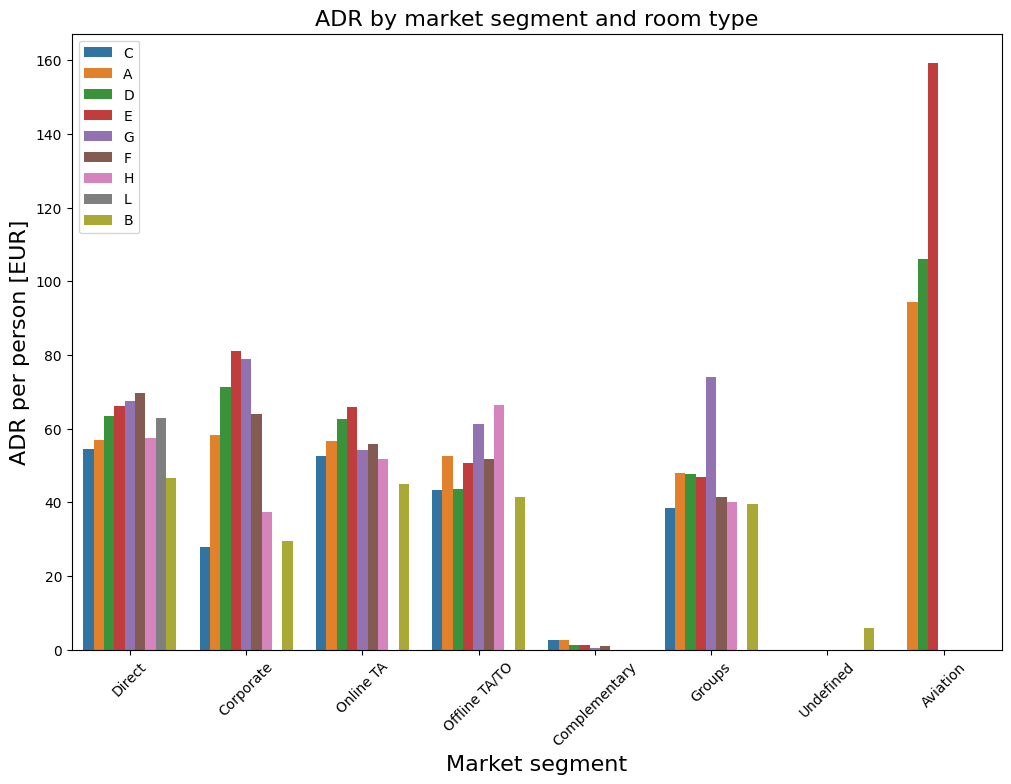

In [95]:
plt.figure(figsize=(12, 8))
sns.barplot(x="market_segment",
            y="adr_Updated",
            hue="reserved_room_type",
            data=Data,
            ci=None)
plt.title("ADR by market segment and room type", fontsize=16)
plt.xlabel("Market segment", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("ADR per person [EUR]", fontsize=16)
plt.legend(loc="upper left")
plt.show()

Różne typy pokoi (oznaczone literami od A do L oraz 8) mają różne wartości ADR w zależności od segmentu rynku. Na przykład, w segmencie "Direct" pokój typu E ma najwyższy ADR, natomiast w segmencie "Corporate" najwyższy ADR ma pokój typu C. W segmencie "Undefined" ADR dla większości typów pokoi jest bardzo niski lub zerowy.W segmencie "Aviation" ADR dla pokoi typu H jest bardzo wysoki, co sugeruje, że ten typ pokoju jest znacznie droższy w tym segmencie w porównaniu do innych. Podsumowując, wykres pokazuje, że zarówno segment rynku, jak i typ pokoju mają znaczący wpływ na średnią cenę za pokój (ADR). Najwyższe ADR występuje w segmentach "Direct" i "Aviation" dla określonych typów pokoi, natomiast najniższe ADR występuje w segmencie "Complementary".


#Ile rezerwacji zostało anulowane

In [96]:
Cancel=Data['is_canceled']==1

In [97]:
cancel=Cancel.sum()

In [100]:
resort_cancelation = Data.loc[Data["hotel"] == "Resort Hotel"]["is_canceled"].sum()
city_cancelation = Data.loc[Data["hotel"] == "City Hotel"]["is_canceled"].sum()

In [101]:
resort_cancelation

11120

In [102]:
city_cancelation

33079

In [103]:
print(f"Total Booking Cancelled : {cancel} . ")
print(f"Total Resort Hotel Booking Cancelled : {resort_cancelation} . ")
print(f"Total City Hotel Booking Cancelled : {city_cancelation} . ")

Total Booking Cancelled : 44199 . 
Total Resort Hotel Booking Cancelled : 11120 . 
Total City Hotel Booking Cancelled : 33079 . 


Liczba anulowanych rezerwacji jest 3 razy wyższa w City Hotel niż w Resort Hotel.

#Miesiące, w których liczba rezygnacji z rezerwacji jest najwyższa

In [104]:
res_book_per_month = Data.loc[(Data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = Data.loc[(Data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = Data.loc[(Data["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = Data.loc[(Data["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})


In [105]:
res_cancel_data

,Hotel,Month,Bookings,Cancelations
0,Resort Hotel,April,3609,1059
1,Resort Hotel,August,4894,1637
2,Resort Hotel,December,2645,631
3,Resort Hotel,February,3102,794
4,Resort Hotel,January,2191,325
5,Resort Hotel,July,4573,1436
6,Resort Hotel,June,3044,1007
7,Resort Hotel,March,3334,763
8,Resort Hotel,May,3559,1024
9,Resort Hotel,November,2435,460


In [106]:
import sort_dataframeby_monthorweek as sd
res_cancel_data=sd.Sort_Dataframeby_Month(df=res_cancel_data,monthcolumnname='Month')
res_cancel_data

,Hotel,Month,Bookings,Cancelations
0,Resort Hotel,January,2191,325
1,Resort Hotel,February,3102,794
2,Resort Hotel,March,3334,763
3,Resort Hotel,April,3609,1059
4,Resort Hotel,May,3559,1024
5,Resort Hotel,June,3044,1007
6,Resort Hotel,July,4573,1436
7,Resort Hotel,August,4894,1637
8,Resort Hotel,September,3108,1006
9,Resort Hotel,October,3553,978


W hotelau "Resort" szczyt rezerwacji przypada na czerwiec i lipiec, co jest zgodne z letnimi wakacjami, podczas gdy liczba rezerwacji jest najniższa w listopadzie. W hotelu "City" rezerwacje są bardziej równomiernie rozłożone w ciągu roku, ale można zauważyć pewne wzrosty w miesiącach letnich oraz na początku roku (styczeń, luty). W hotelu "Resort" anulacje są wyższe w miesiącach o większej liczbie rezerwacji, co może być związane z sezonem wakacyjnym, gdzie ludzie częściej planują i zmieniają swoje plany wakacyjne.
W hotelu "City" anulacje są również stosunkowo wysokie w miesiącach o większej liczbie rezerwacji, ale ogólnie liczba anulacji jest bardziej równomiernie rozłożona w ciągu roku.

In [107]:
import sort_dataframeby_monthorweek as sd
cty_cancel_data=sd.Sort_Dataframeby_Month(df=cty_cancel_data,monthcolumnname='Month')
cty_cancel_data

,Hotel,Month,Bookings,Cancelations
0,City Hotel,January,3730,1481
1,City Hotel,February,4950,1899
2,City Hotel,March,6434,2385
3,City Hotel,April,7469,3459
4,City Hotel,May,8221,3653
5,City Hotel,June,7885,3527
6,City Hotel,July,8071,3301
7,City Hotel,August,8967,3600
8,City Hotel,September,7392,3109
9,City Hotel,October,7594,3268


In [114]:
!pip install plotly pandas


In [117]:

plt.figure(figsize=(12, 8))

trace = go.Bar(
    x=res_cancel_data["Month"],
    y=res_cancel_data["Cancelations"],
    name="Rst Cancelled"
    )
trace1 = go.Bar(
    x=cty_cancel_data["Month"],
    y=cty_cancel_data["Cancelations"],
    name="Cty Cancelled"
    )


data6 = [trace,trace1]
layout = go.Layout(
    title='Total Number of stays by Guest'
)
fig = go.Figure(data=data6, layout=layout)
pyo.plot(fig)

'temp-plot.html'

<Figure size 1200x800 with 0 Axes>

#Wnioski
Hotel "City" ma wyższą liczbę rezerwacji w porównaniu do hotelu "Resort" w większości miesięcy.
Szczytowe wartości dla hoteli "City" są bardziej rozłożone w ciągu roku, natomiast dla hoteli "Resort" koncentrują się głównie w miesiącach letnich.